In [1]:
# Necessary imports
import pandas as pd
import numpy as np

In [2]:
# Reading DataFrame
data = pd.read_csv('Agrofood_co2_emission.csv')

In [3]:
# Overview of the data
data

,Area,Year,Savanna fires,Forest fires,Crop Residues,Rice Cultivation,Drained organic soils (CO2),Pesticides Manufacturing,Food Transport,Forestland,...,Manure Management,Fires in organic soils,Fires in humid tropical forests,On-farm energy use,Rural population,Urban population,Total Population - Male,Total Population - Female,total_emission,Average Temperature °C
0,Afghanistan,1990,14.7237,0.0557,205.6077,686.0000,0.0,11.807483,63.1152,-2388.8030,...,319.1763,0.0,0.0,NaN,9655167.0,2593947.0,5348387.0,5346409.0,2198.963539,0.536167
1,Afghanistan,1991,14.7237,0.0557,209.4971,678.1600,0.0,11.712073,61.2125,-2388.8030,...,342.3079,0.0,0.0,NaN,10230490.0,2763167.0,5372959.0,5372208.0,2323.876629,0.020667
2,Afghanistan,1992,14.7237,0.0557,196.5341,686.0000,0.0,11.712073,53.3170,-2388.8030,...,349.1224,0.0,0.0,NaN,10995568.0,2985663.0,6028494.0,6028939.0,2356.304229,-0.259583
3,Afghanistan,1993,14.7237,0.0557,230.8175,686.0000,0.0,11.712073,54.3617,-2388.8030,...,352.2947,0.0,0.0,NaN,11858090.0,3237009.0,7003641.0,7000119.0,2368.470529,0.101917
4,Afghanistan,1994,14.7237,0.0557,242.0494,705.6000,0.0,11.712073,53.9874,-2388.8030,...,367.6784,0.0,0.0,NaN,12690115.0,3482604.0,7733458.0,7722096.0,2500.768729,0.372250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6960,Zimbabwe,2016,1190.0089,232.5068,70.9451,7.4088,0.0,75.000000,251.1465,76500.2982,...,282.5994,0.0,0.0,417.3150,10934468.0,5215894.0,6796658.0,7656047.0,98491.026347,1.120250
6961,Zimbabwe,2017,1431.1407,131.1324,108.6262,7.9458,0.0,67.000000,255.7975,76500.2982,...,255.5900,0.0,0.0,398.1644,11201138.0,5328766.0,6940631.0,7810471.0,97159.311553,0.046500
6962,Zimbabwe,2018,1557.5830,221.6222,109.9835,8.1399,0.0,66.000000,327.0897,76500.2982,...,257.2735,0.0,0.0,465.7735,11465748.0,5447513.0,7086002.0,7966181.0,97668.308205,0.516333
6963,Zimbabwe,2019,1591.6049,171.0262,45.4574,7.8322,0.0,73.000000,290.1893,76500.2982,...,267.5224,0.0,0.0,444.2335,11725970.0,5571525.0,7231989.0,8122618.0,98988.062799,0.985667


Data containg 6965 entries and 31 variables.

Collection of CO2 emmision, contributors for emmission, and forestation (negative emission)
In every country on the globe during the years 1990-2020.

In [4]:
# Checking all variables available
data.columns

Index(['Area', 'Year', 'Savanna fires', 'Forest fires', 'Crop Residues',
       'Rice Cultivation', 'Drained organic soils (CO2)',
       'Pesticides Manufacturing', 'Food Transport', 'Forestland',
       'Net Forest conversion', 'Food Household Consumption', 'Food Retail',
       'On-farm Electricity Use', 'Food Packaging',
       'Agrifood Systems Waste Disposal', 'Food Processing',
       'Fertilizers Manufacturing', 'IPPU', 'Manure applied to Soils',
       'Manure left on Pasture', 'Manure Management', 'Fires in organic soils',
       'Fires in humid tropical forests', 'On-farm energy use',
       'Rural population', 'Urban population', 'Total Population - Male',
       'Total Population - Female', 'total_emission',
       'Average Temperature °C'],
      dtype='object')

In [5]:
data.info()
# From the Non-Null count view, we can see that some columns have missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6965 entries, 0 to 6964
Data columns (total 31 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Area                             6965 non-null   object 
 1   Year                             6965 non-null   int64  
 2   Savanna fires                    6934 non-null   float64
 3   Forest fires                     6872 non-null   float64
 4   Crop Residues                    5576 non-null   float64
 5   Rice Cultivation                 6965 non-null   float64
 6   Drained organic soils (CO2)      6965 non-null   float64
 7   Pesticides Manufacturing         6965 non-null   float64
 8   Food Transport                   6965 non-null   float64
 9   Forestland                       6472 non-null   float64
 10  Net Forest conversion            6472 non-null   float64
 11  Food Household Consumption       6492 non-null   float64
 12  Food Retail         

In [6]:
# Convert Male and Female Total population to int
data['Total Population - Male'] = data['Total Population - Male'].astype(int)
data['Total Population - Female'] = data['Total Population - Female'].astype(int)

# Create total population Column
data['TotalPopulation'] = data['Total Population - Male'] + data['Total Population - Female']

# Initializing columns to rename
column_rename_mapping = {
    'Area': 'Country',
    'Forestland': 'ForestlandNeg.Emission',
    'Average Temperature °C': 'Average°CChange'
}

# Renaming columns
data.rename(columns=column_rename_mapping, inplace=True)


In [7]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,6965.0,2.005125e+03,8.894665e+00,1990.000000,1997.000000,2.005000e+03,2.013000e+03,2.020000e+03
Savanna fires,6934.0,1.188391e+03,5.246288e+03,0.000000,0.000000,1.651850e+00,1.110814e+02,1.146164e+05
Forest fires,6872.0,9.193022e+02,3.720079e+03,0.000000,0.000000,5.179000e-01,6.495077e+01,5.222763e+04
Crop Residues,5576.0,9.987063e+02,3.700345e+03,0.000200,11.006525,1.036982e+02,3.776410e+02,3.349007e+04
Rice Cultivation,6965.0,4.259667e+03,1.761383e+04,0.000000,181.260800,5.348174e+02,1.536640e+03,1.649153e+05
Drained organic soils (CO2),6965.0,3.503229e+03,1.586145e+04,0.000000,0.000000,0.000000e+00,6.904088e+02,2.410251e+05
Pesticides Manufacturing,6965.0,3.334184e+02,1.429159e+03,0.000000,6.000000,1.300000e+01,1.163255e+02,1.645900e+04
Food Transport,6965.0,1.939582e+03,5.616749e+03,0.000100,27.958600,2.049628e+02,1.207001e+03,6.794576e+04
ForestlandNeg.Emission,6472.0,-1.782829e+04,8.183221e+04,-797183.079000,-2848.350000,-6.292000e+01,0.000000e+00,1.711211e+05
Net Forest conversion,6472.0,1.760564e+04,1.011575e+05,0.000000,0.000000,4.444000e+01,4.701746e+03,1.605106e+06


In [8]:
# Exploring missing values in Dataframe by variable
missing_counts = data.isnull().sum()
sorted_missing_counts = missing_counts[missing_counts > 0].sort_values(ascending=False)
print('Missing Values Per Column:')
print(sorted_missing_counts)

Missing Values Per Column:
Crop Residues                      1389
On-farm energy use                  956
Manure applied to Soils             928
Manure Management                   928
IPPU                                743
ForestlandNeg.Emission              493
Net Forest conversion               493
Food Household Consumption          473
Fires in humid tropical forests     155
Forest fires                         93
Savanna fires                        31
dtype: int64


In [9]:
# Suspition with data loss in earlier years
# Counting missing values by year
missing_values = data.isnull()
missing_counts_by_year = missing_values.groupby(data['Year']).sum()
sum_years_with_na = missing_counts_by_year.sum(axis=1)
sorted_years_with_na = sum_years_with_na.sort_values(ascending=False)

print("Years and missing value counts:")
print(sorted_years_with_na)

# Does not seem to be the case according to my suspicion


Years and missing value counts:
Year
1991    231
1992    228
1993    227
1994    222
1995    220
1996    220
1997    220
1998    219
1999    218
2020    216
2000    216
2001    216
2005    215
2003    214
2004    214
2002    214
2006    213
2007    213
2008    213
2009    213
2010    213
1990    212
2015    211
2016    211
2017    211
2018    211
2019    211
2011    210
2013    210
2014    210
2012    210
dtype: int64


In [10]:
# Checking what countries could be the reason for values missing
# Counting missing values by Country
missing_counts_by_country = missing_values.groupby(data['Country']).sum()
sum_country_with_na = missing_counts_by_country.sum(axis=1)
sorted_country_with_na = sum_country_with_na[sum_country_with_na > 0].sort_values(ascending=False)

with pd.option_context('display.max_rows', None):
    print("countries and missing value counts:")
    print(sorted_country_with_na)

# Does not seem to be the case according to my suspicion

countries and missing value counts:
Country
Channel Islands                                 279
Holy See                                        217
Isle of Man                                     198
San Marino                                      186
British Virgin Islands                          186
United States Virgin Islands                    186
Monaco                                          186
Western Sahara                                  185
Bermuda                                         185
Guam                                            185
Saint Pierre and Miquelon                       155
Anguilla                                        155
Wallis and Futuna Islands                       155
Palau                                           152
Montserrat                                      132
Falkland Islands (Malvinas)                     127
Greenland                                       124
American Samoa                                  124
Gibraltar           

In [11]:
data_2020 = data[data['Year'] == 2020].reset_index()
NA_countries_pop = []

for i in range(len(data_2020)):
    if data_2020.Country[i] in sorted_country_with_na:
        NA_countries_pop.append([data_2020.Country[i], data_2020.TotalPopulation[i], sorted_country_with_na[data_2020.Country[i]]])

S_NA_countries_pop = sorted(NA_countries_pop, key=lambda x: x[2], reverse=True)


S_NA_countries_pop


[['Channel Islands', 33992237, 279],
 ['Holy See', 520, 217],
 ['Isle of Man', 84045, 198],
 ['British Virgin Islands', 30910, 186],
 ['Monaco', 36922, 186],
 ['San Marino', 34007, 186],
 ['United States Virgin Islands', 100443, 186],
 ['Bermuda', 64031, 185],
 ['Guam', 169231, 185],
 ['Western Sahara', 556049, 185],
 ['Anguilla', 15585, 155],
 ['Saint Pierre and Miquelon', 5905, 155],
 ['Wallis and Futuna Islands', 11654, 155],
 ['Palau', 17972, 152],
 ['Montserrat', 4500, 132],
 ['Falkland Islands (Malvinas)', 3747, 127],
 ['American Samoa', 46189, 124],
 ['Cayman Islands', 67311, 124],
 ['Gibraltar', 32709, 124],
 ['Greenland', 56027, 124],
 ['Liechtenstein', 38757, 124],
 ['Mayotte', 305587, 124],
 ['Saint Helena, Ascension and Tristan da Cunha', 5421, 124],
 ['Tokelau', 1827, 124],
 ['China, Hong Kong SAR', 7500957, 123],
 ['Northern Mariana Islands', 49587, 122],
 ['Palestine', 5019401, 105],
 ['Martinique', 370390, 95],
 ['Andorra', 77699, 93],
 ['Aruba', 106584, 93],
 ['China, 

After the research it is conclusive that most of the countries with missing values seem to be the ones that are islands or countries with small populations.
A decision to keep them due to them having a low impact on total calculations.
It has been concluded that some countries such as Channel Islands seem to have missed information. Through online research, Channel island is seen to have a population of 176,355 but in the dataframe it shows to have a population of 33,992,238. 
This country will be removed due to the value being high and having a large sum of missing values.

In [12]:
# Checking for countries will very low emmission
margin = 1000

# Filter countries with total emissions close to 0 within the margin
filtered_countries = data[data['total_emission'].abs() < margin]

# Count occurrences of each country
country_counts = filtered_countries['Country'].value_counts()

print("Countries with Total Emissions Close to 0:")
for country, count in country_counts.items():
    print(f"Country: {country}, Count: {count}")

Countries with Total Emissions Close to 0:
Country: New Caledonia, Count: 31
Country: New Zealand, Count: 6
Country: Uruguay, Count: 5
Country: Estonia, Count: 5
Country: Montenegro, Count: 5
Country: Bulgaria, Count: 3
Country: Georgia, Count: 3
Country: Cuba, Count: 3
Country: Chile, Count: 2
Country: Viet Nam, Count: 1
Country: Russian Federation, Count: 1
Country: Burundi, Count: 1


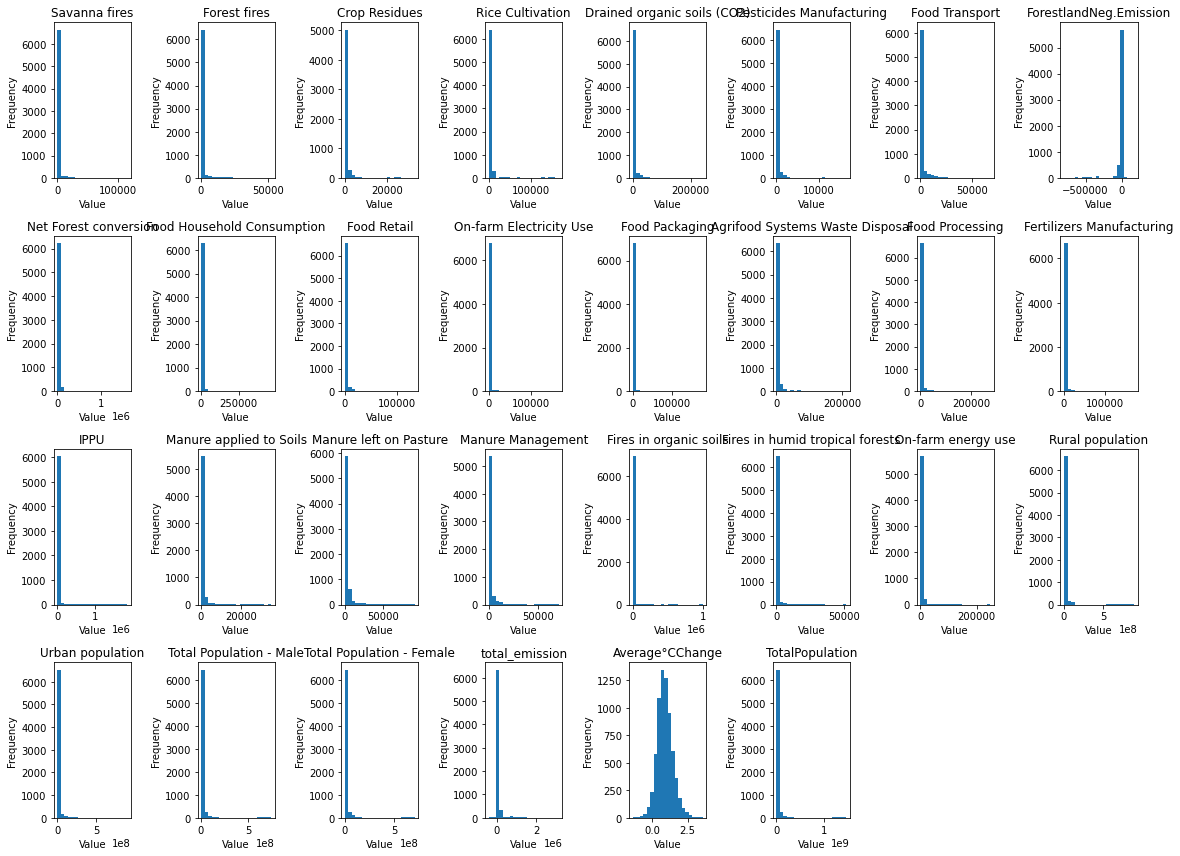

In [13]:
import matplotlib.pyplot as plt

viz_data = data.drop(['Country', 'Year'], axis=1)

num_variables = len(viz_data.columns)

# Calculate the number of rows and columns for subplots
num_rows = 4  # Splitting into four rows
num_cols = (num_variables - 1) // num_rows + 1

# Create subplots
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(16, 12))  # Adjust the figure size as needed

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Iterate through each variable and create a histogram
for i, col in enumerate(viz_data.columns):
    viz_data[col].plot(kind='hist', ax=axes[i], bins=20)  # You can adjust the number of bins as needed
    axes[i].set_title(f'{col}')
    axes[i].set_xlabel('Value')
    axes[i].set_ylabel('Frequency')

# Remove any empty subplots
for i in range(num_variables, num_rows * num_cols):
    fig.delaxes(axes[i])

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

After viewing the Histograms, it seems that most countries are minor contributors to CO2 emmission while there is a much smaller selection of countries that are the major contributors to the CO2 emmission in the world

In [17]:
# Countries to remove due to missing values or very low emmission
# Rural and urban populations will not be used in the visualization
# Male and Female population split is not neccesary for the goal of the analysis

countries_to_remove = ['New Caledonia', 'Channel Islands']

# Remove rows of specified countries
data = data[~data['Country'].isin(countries_to_remove)]

# Remove Unecessary columns
columns_to_drop = ['Urban population', 'Rural population', 'Total Population - Male', 'Total Population - Female']

data.drop(columns=columns_to_drop, inplace=True)

# Reset the index
data.reset_index(drop=True, inplace=True)

# Display the modified dataset
data

,Country,Year,Savanna fires,Forest fires,Crop Residues,Rice Cultivation,Drained organic soils (CO2),Pesticides Manufacturing,Food Transport,ForestlandNeg.Emission,...,IPPU,Manure applied to Soils,Manure left on Pasture,Manure Management,Fires in organic soils,Fires in humid tropical forests,On-farm energy use,total_emission,Average°CChange,TotalPopulation
0,Afghanistan,1990,14.7237,0.0557,205.6077,686.0000,0.0,11.807483,63.1152,-2388.8030,...,209.9778,260.1431,1590.5319,319.1763,0.0,0.0,NaN,2198.963539,0.536167,10694796
1,Afghanistan,1991,14.7237,0.0557,209.4971,678.1600,0.0,11.712073,61.2125,-2388.8030,...,217.0388,268.6292,1657.2364,342.3079,0.0,0.0,NaN,2323.876629,0.020667,10745167
2,Afghanistan,1992,14.7237,0.0557,196.5341,686.0000,0.0,11.712073,53.3170,-2388.8030,...,222.1156,264.7898,1653.5068,349.1224,0.0,0.0,NaN,2356.304229,-0.259583,12057433
3,Afghanistan,1993,14.7237,0.0557,230.8175,686.0000,0.0,11.712073,54.3617,-2388.8030,...,201.2057,261.7221,1642.9623,352.2947,0.0,0.0,NaN,2368.470529,0.101917,14003760
4,Afghanistan,1994,14.7237,0.0557,242.0494,705.6000,0.0,11.712073,53.9874,-2388.8030,...,182.2905,267.6219,1689.3593,367.6784,0.0,0.0,NaN,2500.768729,0.372250,15455554
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6898,Zimbabwe,2016,1190.0089,232.5068,70.9451,7.4088,0.0,75.000000,251.1465,76500.2982,...,858.9820,96.1332,2721.1459,282.5994,0.0,0.0,417.3150,98491.026347,1.120250,14452705
6899,Zimbabwe,2017,1431.1407,131.1324,108.6262,7.9458,0.0,67.000000,255.7975,76500.2982,...,889.4250,81.2314,2744.8763,255.5900,0.0,0.0,398.1644,97159.311553,0.046500,14751102
6900,Zimbabwe,2018,1557.5830,221.6222,109.9835,8.1399,0.0,66.000000,327.0897,76500.2982,...,966.2650,81.0712,2790.0949,257.2735,0.0,0.0,465.7735,97668.308205,0.516333,15052183
6901,Zimbabwe,2019,1591.6049,171.0262,45.4574,7.8322,0.0,73.000000,290.1893,76500.2982,...,945.9420,85.7211,2828.7215,267.5224,0.0,0.0,444.2335,98988.062799,0.985667,15354607


In [18]:
data.to_csv('Updated_Co2_Emission.csv', index=False)